In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize3 as inv
import datetime

In [4]:
retail = pd.read_csv("C:\\Users\\Khush Bhuta\\Desktop\\python_workspace\\data\\Uk_Ireland.csv")

In [5]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,Country,date,revenue,year,month
0,489434.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01T07:45:00Z,6.95,13085.0,UKUK,01-12-2009,83.4,2009,Dec
1,489434.0,79323P,PINK CHERRY LIGHTS,12,2009-12-01T07:45:00Z,6.75,13085.0,UKUK,01-12-2009,81.0,2009,Dec
2,489434.0,79323W,WHITE CHERRY LIGHTS,12,2009-12-01T07:45:00Z,6.75,13085.0,UKUK,01-12-2009,81.0,2009,Dec
3,489434.0,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01T07:45:00Z,2.10,13085.0,UKUK,01-12-2009,100.8,2009,Dec
4,489434.0,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01T07:45:00Z,1.25,13085.0,UKUK,01-12-2009,30.0,2009,Dec


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944148 entries, 0 to 944147
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      944146 non-null  float64
 1   StockCode    944148 non-null  object 
 2   Description  944148 non-null  object 
 3   Quantity     944148 non-null  int64  
 4   InvoiceDate  944148 non-null  object 
 5   Price        944148 non-null  float64
 6   Customer.ID  715999 non-null  float64
 7   Country      944148 non-null  object 
 8   date         944148 non-null  object 
 9   revenue      944148 non-null  float64
 10  year         944148 non-null  int64  
 11  month        944148 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 86.4+ MB


In [7]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [8]:
retail = retail.drop_duplicates()

In [9]:
retail = retail.dropna(axis = 0)

In [10]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,Country,date,revenue,year,month
0,489434.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00+00:00,6.95,13085.0,UKUK,01-12-2009,83.4,2009,Dec
1,489434.0,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00+00:00,6.75,13085.0,UKUK,01-12-2009,81.0,2009,Dec
2,489434.0,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00+00:00,6.75,13085.0,UKUK,01-12-2009,81.0,2009,Dec
3,489434.0,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00+00:00,2.10,13085.0,UKUK,01-12-2009,100.8,2009,Dec
4,489434.0,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00+00:00,1.25,13085.0,UKUK,01-12-2009,30.0,2009,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...
944143,581585.0,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00+00:00,1.95,15804.0,UKUK,09-12-2011,23.4,2011,Dec
944144,581586.0,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00+00:00,2.95,13113.0,UKUK,09-12-2011,23.6,2011,Dec
944145,581586.0,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00+00:00,1.25,13113.0,UKUK,09-12-2011,30.0,2011,Dec
944146,581586.0,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00+00:00,8.95,13113.0,UKUK,09-12-2011,214.8,2011,Dec


In [16]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715999 entries, 0 to 944147
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Invoice      715999 non-null  float64            
 1   StockCode    715999 non-null  object             
 2   Description  715999 non-null  object             
 3   Quantity     715999 non-null  int64              
 4   InvoiceDate  715999 non-null  datetime64[ns, UTC]
 5   Price        715999 non-null  float64            
 6   Customer.ID  715999 non-null  float64            
 7   Country      715999 non-null  object             
 8   date         715999 non-null  object             
 9   revenue      715999 non-null  float64            
 10  year         715999 non-null  int64              
 11  month        715999 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(5)
memory usage: 71.0+ MB


In [14]:
retail['date'] = retail.InvoiceDate.dt.strftime('%Y-%m-%d')

In [15]:
retail['date']

0         2009-12-01
1         2009-12-01
2         2009-12-01
3         2009-12-01
4         2009-12-01
             ...    
944143    2011-12-09
944144    2011-12-09
944145    2011-12-09
944146    2011-12-09
944147    2011-12-09
Name: date, Length: 715999, dtype: object

In [17]:
retail['date'] = pd.to_datetime(retail['date'])

In [18]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715999 entries, 0 to 944147
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Invoice      715999 non-null  float64            
 1   StockCode    715999 non-null  object             
 2   Description  715999 non-null  object             
 3   Quantity     715999 non-null  int64              
 4   InvoiceDate  715999 non-null  datetime64[ns, UTC]
 5   Price        715999 non-null  float64            
 6   Customer.ID  715999 non-null  float64            
 7   Country      715999 non-null  object             
 8   date         715999 non-null  datetime64[ns]     
 9   revenue      715999 non-null  float64            
 10  year         715999 non-null  int64              
 11  month        715999 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 71.0+ MB


In [19]:
max_date = max(retail.date)

In [20]:
max_date

Timestamp('2011-12-09 00:00:00')

In [21]:
retail.Country.value_counts()

Country
UKUK    700432
EIRE     15567
Name: count, dtype: int64

In [25]:
last_three = retail[retail['date']>'2011-09-09']

In [26]:
last_three

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,Country,date,revenue,year,month
756050,566225.0,22384,LUNCH BAG PINK POLKADOT,6,2011-09-11 10:35:00+00:00,1.65,16899.0,UKUK,2011-09-11,9.90,2011,Sep
756051,566225.0,20725,LUNCH BAG RED RETROSPOT,6,2011-09-11 10:35:00+00:00,1.65,16899.0,UKUK,2011-09-11,9.90,2011,Sep
756052,566225.0,23169,CLASSIC GLASS COOKIE JAR,3,2011-09-11 10:35:00+00:00,4.15,16899.0,UKUK,2011-09-11,12.45,2011,Sep
756053,566225.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,3,2011-09-11 10:35:00+00:00,4.25,16899.0,UKUK,2011-09-11,12.75,2011,Sep
756054,566225.0,21479,WHITE SKULL HOT WATER BOTTLE,3,2011-09-11 10:35:00+00:00,4.25,16899.0,UKUK,2011-09-11,12.75,2011,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...
944143,581585.0,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00+00:00,1.95,15804.0,UKUK,2011-12-09,23.40,2011,Dec
944144,581586.0,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00+00:00,2.95,13113.0,UKUK,2011-12-09,23.60,2011,Dec
944145,581586.0,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00+00:00,1.25,13113.0,UKUK,2011-12-09,30.00,2011,Dec
944146,581586.0,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00+00:00,8.95,13113.0,UKUK,2011-12-09,214.80,2011,Dec


In [27]:
last_three.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer.ID', 'Country', 'date', 'revenue', 'year', 'month'],
      dtype='object')

In [29]:
last_three['revenue'] = last_three['Price']*last_three['Quantity']

C:\Users\Khush Bhuta\AppData\Local\Temp\ipykernel_21460\3344553319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_three['revenue'] = last_three['Price']*last_three['Quantity']


In [34]:
a = last_three.groupby(['date','Description']).agg(total_daily = ('Quantity','sum'),
                                                  total_revenue = ('revenue','sum')).reset_index()

In [35]:
a

,date,Description,total_daily,total_revenue
0,2011-09-11,10 COLOUR SPACEBOY PEN,1,0.85
1,2011-09-11,12 DAISY PEGS IN WOOD BOX,1,1.65
2,2011-09-11,12 EGG HOUSE PAINTED WOOD,1,12.75
3,2011-09-11,12 IVORY ROSE PEG PLACE SETTINGS,9,11.25
4,2011-09-11,12 MESSAGE CARDS WITH ENVELOPES,12,19.80
...,...,...,...,...
74674,2011-12-09,YOU'RE CONFUSING ME METAL SIGN,1,1.69
74675,2011-12-09,ZINC SWEETHEART SOAP DISH,12,9.48
74676,2011-12-09,ZINC T-LIGHT HOLDER STAR LARGE,12,11.40
74677,2011-12-09,ZINC WILLIE WINKIE CANDLE STICK,24,20.40


In [40]:
grouped = a.groupby('Description').agg(average = ('total_daily','mean'),
                                      sd = ('total_daily','std'),
                                      total_sales = ('total_daily','sum'),
                                      total_revenue = ('total_revenue','sum')).reset_index()

In [41]:
grouped

,Description,average,sd,total_sales,total_revenue
0,10 COLOUR SPACEBOY PEN,33.480000,26.838322,1674,1436.16
1,12 COLOURED PARTY BALLOONS,17.666667,13.427273,583,380.75
2,12 DAISY PEGS IN WOOD BOX,1.428571,0.534522,10,16.50
3,12 EGG HOUSE PAINTED WOOD,2.333333,1.814970,42,545.52
4,12 HANGING EGGS HAND PAINTED,6.666667,3.669696,40,83.20
...,...,...,...,...,...
3085,ZINC T-LIGHT HOLDER STARS SMALL,31.634615,39.953418,1645,1329.83
3086,ZINC TOP 2 DOOR WOODEN SHELF,1.000000,NaN,1,16.95
3087,ZINC WILLIE WINKIE CANDLE STICK,19.145455,12.693565,1053,905.97
3088,ZINC WIRE KITCHEN ORGANISER,3.000000,3.162278,18,84.00


In [42]:
for_abc = inv.productmix(grouped['Description'],grouped['total_sales'],grouped['total_revenue'])

In [43]:
for_abc

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
1826,PAPER CHAIN KIT 50'S CHRISTMAS,12004,32903.640,7.382525e-03,0.046714,1.171451e-02,0.011715,A,A,A_A
1365,JUMBO BAG RED RETROSPOT,13978,26296.940,8.596545e-03,0.031550,9.362358e-03,0.021077,A,A,A_A
2167,REGENCY CAKESTAND 3 TIER,2189,25641.300,1.346247e-03,0.395081,9.128934e-03,0.030206,A,A,A_A
2950,WHITE HANGING HEART T-LIGHT HOLDER,8637,24296.510,5.311802e-03,0.081521,8.650155e-03,0.038856,A,A,A_A
1288,HOT WATER BOTTLE KEEP CALM,4712,21500.400,2.897905e-03,0.166115,7.654672e-03,0.046511,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
2976,WHITE/PINK CHICK EASTER DECORATION,1,0.850,6.150054e-07,0.999965,3.026209e-07,1.000000,C,C,C_C
515,CHAMPAGNE TRAY BLANK CARD,3,0.570,1.845016e-06,0.999763,2.029340e-07,1.000000,C,C,C_C
1220,HAPPY BIRTHDAY CARD STRIPEY TEDDY,1,0.190,6.150054e-07,0.999961,6.764468e-08,1.000000,C,C,C_C
1170,"GREETING CARD, STICKY GORDON",1,0.190,6.150054e-07,0.999989,6.764468e-08,1.000000,C,C,C_C


In [44]:
for_abc.product_mix.value_counts()

product_mix
C_C    1384
A_A     477
B_B     313
B_C     231
C_B     230
A_B     215
B_A     168
A_C      41
C_A      31
Name: count, dtype: int64

In [46]:
lead_time = 21
sd_leadtime = 2

In [47]:
mapping = {
    'A_A' : 0.8, 'A_C' : 0.7, 'A_B': 0.8,
    'C_A' : 0.8, 'C_B' : 0.6,
    'B_C' : 0.6, 'B_A' : 0.8, 'C_C' : 0.6, 'B_B' : 0.7
}

In [48]:
for_abc['service_level'] = for_abc.product_mix.map(mapping)

In [49]:
for_abc['service_level']

1826    0.8
1365    0.8
2167    0.8
2950    0.8
1288    0.8
       ... 
2976    0.6
515     0.6
1220    0.6
1170    0.6
1792    0.6
Name: service_level, Length: 3090, dtype: float64

In [50]:
abcd = for_abc[['skus','service_level']]

In [51]:
abcd

,skus,service_level
1826,PAPER CHAIN KIT 50'S CHRISTMAS,0.8
1365,JUMBO BAG RED RETROSPOT,0.8
2167,REGENCY CAKESTAND 3 TIER,0.8
2950,WHITE HANGING HEART T-LIGHT HOLDER,0.8
1288,HOT WATER BOTTLE KEEP CALM,0.8
...,...,...
2976,WHITE/PINK CHICK EASTER DECORATION,0.6
515,CHAMPAGNE TRAY BLANK CARD,0.6
1220,HAPPY BIRTHDAY CARD STRIPEY TEDDY,0.6
1170,"GREETING CARD, STICKY GORDON",0.6


In [52]:
for_reorder = pd.merge(grouped,abcd,how='left',left_on = 'Description',right_on='skus')

In [53]:
for_reorder.columns

Index(['Description', 'average', 'sd', 'total_sales', 'total_revenue', 'skus',
       'service_level'],
      dtype='object')

In [55]:
empty_data_ltv = pd.DataFrame()

In [56]:
for i in range(for_reorder.shape[0]):
    ordering_point = inv.reorderpoint_leadtime_variability(int(for_reorder.loc[i,'average']),
                                                          for_reorder.loc[i,'sd'], 21, 2,
                                                          for_reorder.loc[i,'service_level'])
    as_data = pd.DataFrame(ordering_point,index=[0])
    as_data['Description'] = for_reorder.loc[i,'Description']
    empty_data_ltv = pd.concat([empty_data_ltv,as_data],axis=0)

In [57]:
empty_data_ltv

,demandleadtime,sigmadl,safteyfactor,reorder_point,Description
0,693,131.537849,0.841621,803.705047,10 COLOUR SPACEBOY PEN
0,357,66.046385,0.524401,391.634758,12 COLOURED PARTY BALLOONS
0,21,2.449490,0.253347,21.620571,12 DAISY PEGS IN WOOD BOX
0,42,8.898116,0.253347,44.254312,12 EGG HOUSE PAINTED WOOD
0,126,18.889150,0.253347,130.785512,12 HANGING EGGS HAND PAINTED
...,...,...,...,...,...
0,651,188.259896,0.841621,809.443526,ZINC T-LIGHT HOLDER STARS SMALL
0,21,NaN,0.253347,NaN,ZINC TOP 2 DOOR WOODEN SHELF
0,399,64.059805,0.841621,452.914092,ZINC WILLIE WINKIE CANDLE STICK
0,63,15.033296,0.253347,66.808642,ZINC WIRE KITCHEN ORGANISER


In [58]:
all_data = pd.merge(for_reorder,empty_data_ltv, how='left')

In [59]:
all_data

,Description,average,sd,total_sales,total_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point
0,10 COLOUR SPACEBOY PEN,33.480000,26.838322,1674,1436.16,10 COLOUR SPACEBOY PEN,0.8,693,131.537849,0.841621,803.705047
1,12 COLOURED PARTY BALLOONS,17.666667,13.427273,583,380.75,12 COLOURED PARTY BALLOONS,0.7,357,66.046385,0.524401,391.634758
2,12 DAISY PEGS IN WOOD BOX,1.428571,0.534522,10,16.50,12 DAISY PEGS IN WOOD BOX,0.6,21,2.449490,0.253347,21.620571
3,12 EGG HOUSE PAINTED WOOD,2.333333,1.814970,42,545.52,12 EGG HOUSE PAINTED WOOD,0.6,42,8.898116,0.253347,44.254312
4,12 HANGING EGGS HAND PAINTED,6.666667,3.669696,40,83.20,12 HANGING EGGS HAND PAINTED,0.6,126,18.889150,0.253347,130.785512
...,...,...,...,...,...,...,...,...,...,...,...
3085,ZINC T-LIGHT HOLDER STARS SMALL,31.634615,39.953418,1645,1329.83,ZINC T-LIGHT HOLDER STARS SMALL,0.8,651,188.259896,0.841621,809.443526
3086,ZINC TOP 2 DOOR WOODEN SHELF,1.000000,NaN,1,16.95,ZINC TOP 2 DOOR WOODEN SHELF,0.6,21,NaN,0.253347,NaN
3087,ZINC WILLIE WINKIE CANDLE STICK,19.145455,12.693565,1053,905.97,ZINC WILLIE WINKIE CANDLE STICK,0.8,399,64.059805,0.841621,452.914092
3088,ZINC WIRE KITCHEN ORGANISER,3.000000,3.162278,18,84.00,ZINC WIRE KITCHEN ORGANISER,0.6,63,15.033296,0.253347,66.808642


In [60]:
all_data['safety_stock'] = all_data['reorder_point'] - all_data['demandleadtime']

In [62]:
all_data[all_data.safety_stock == max(all_data.safety_stock)]

,Description,average,sd,total_sales,total_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point,safety_stock
203,ASSTD DESIGN 3D PAPER STICKERS,2108.666667,5110.408581,12652,34.48,ASSTD DESIGN 3D PAPER STICKERS,0.7,44268,23607.819111,0.524401,56647.952446,12379.952446


In [63]:
all_data = all_data[all_data.safety_stock != max(all_data.safety_stock)]

<Axes: xlabel='sd', ylabel='safety_stock'>

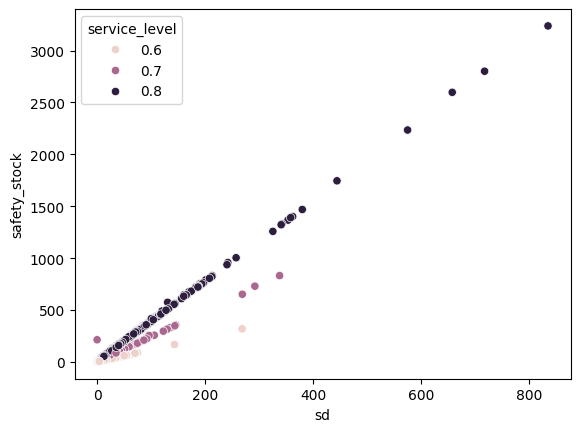

In [64]:
sns.scatterplot(x='sd',y='safety_stock',hue='service_level',data=all_data)